In [1]:
# Install required libraries if not already installed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv('bank-full.csv',sep=";")


# EDA

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
data.drop(['balance','contact','day','duration'	,'campaign',	'pdays',	'previous'],axis=1,inplace=True)

In [9]:
data['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

# Visualize 

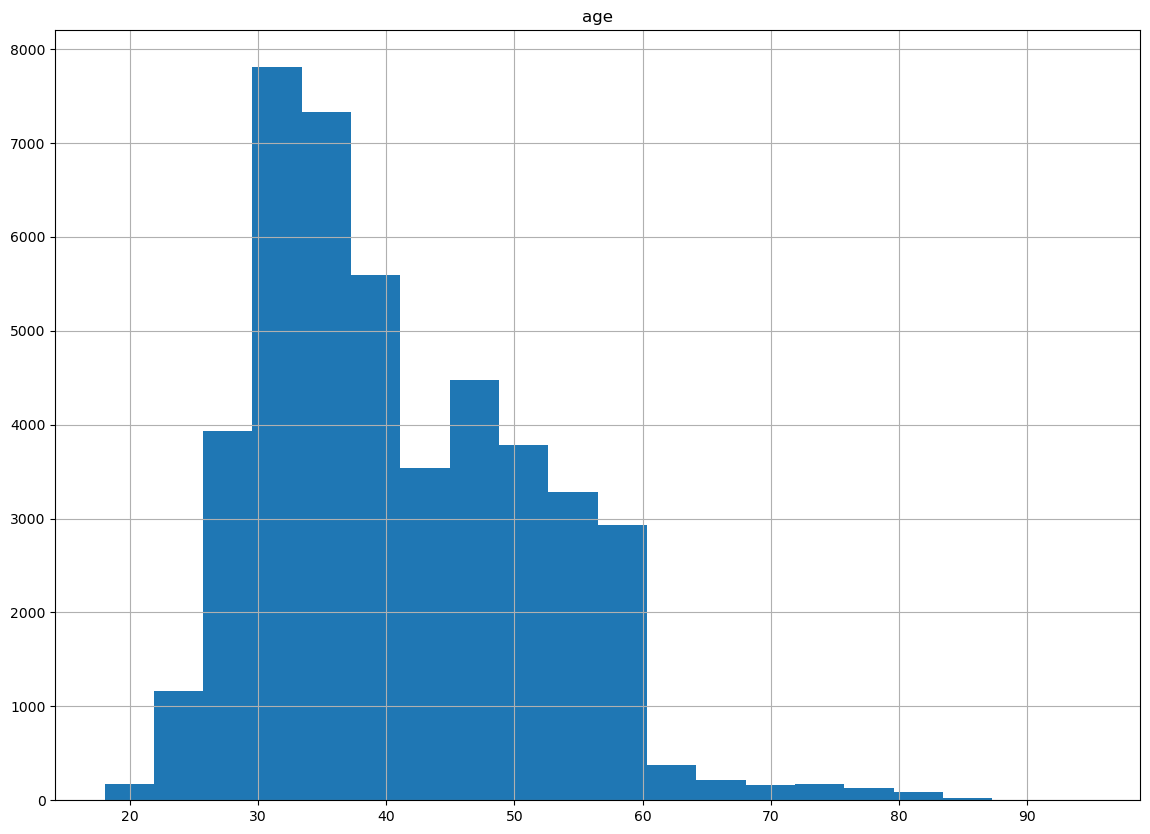

In [11]:
# Plot distributions of numerical columns
data.hist(bins=20, figsize=(14, 10))
plt.show()

In [12]:
data.select_dtypes('number').corr()

,age
age,1.0


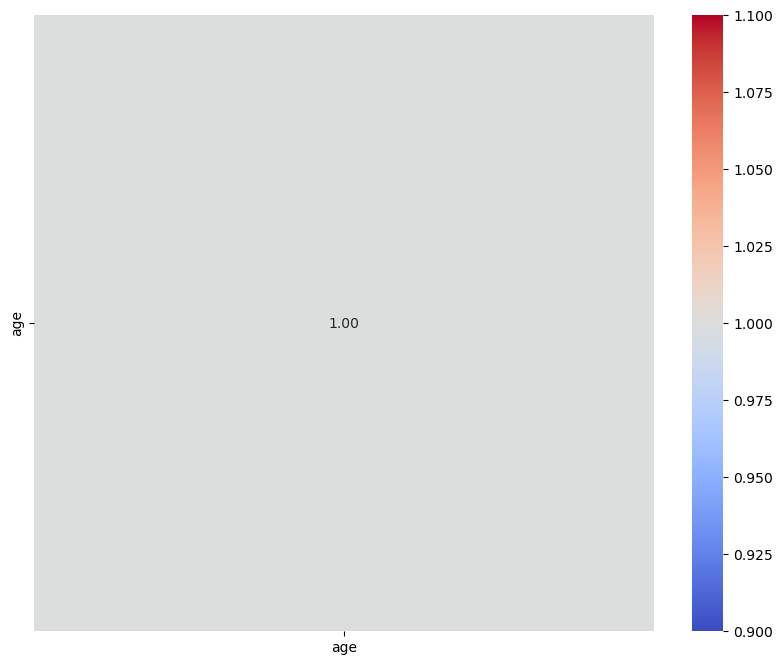

In [13]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.select_dtypes('number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Data Preprocessing

In [15]:
data

,age,job,marital,education,default,housing,loan,month,poutcome,y
0,58,management,married,tertiary,no,yes,no,may,unknown,no
1,44,technician,single,secondary,no,yes,no,may,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,may,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,may,unknown,no
4,33,unknown,single,unknown,no,no,no,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,no,nov,unknown,yes
45207,71,retired,divorced,primary,no,no,no,nov,unknown,yes
45208,72,retired,married,secondary,no,no,no,nov,success,yes
45209,57,blue-collar,married,secondary,no,no,no,nov,unknown,no


In [16]:
# Convert target variable (e.g., 'y') to binary 0/1
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [17]:
# Split the dataset into training and testing sets
X = data.drop('y', axis=1)
y = data['y']

In [18]:
#X.drop('age',axis=1,inplace=True)
X.shape

(45211, 9)

In [19]:
y.shape

(45211,)

In [20]:
# encode Label Encoder
X = pd.get_dummies(X)

In [21]:
#train test split our data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Feature scaling for numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Initialize the XGBoost classifier
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]


Accuracy: 89.04%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.59      0.24      0.34      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



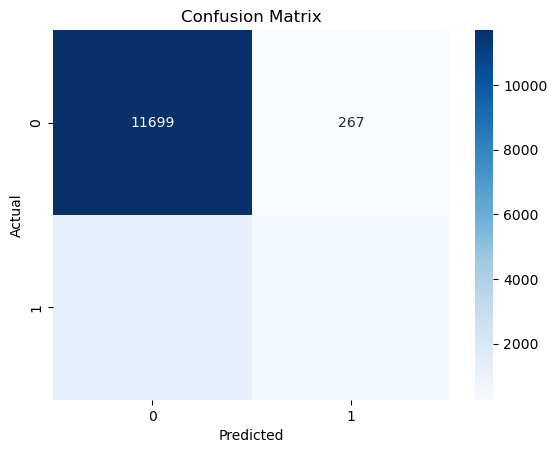

AUC-ROC Score: 0.74


In [24]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# AUC-ROC Score
roc_score = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC Score: {roc_score:.2f}')


In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearch
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=params, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Best model prediction and evaluation
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)
print(f'Tuned Accuracy: {accuracy_score(y_test, y_best_pred) * 100:.2f}%')


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Tuned Accuracy: 89.12%


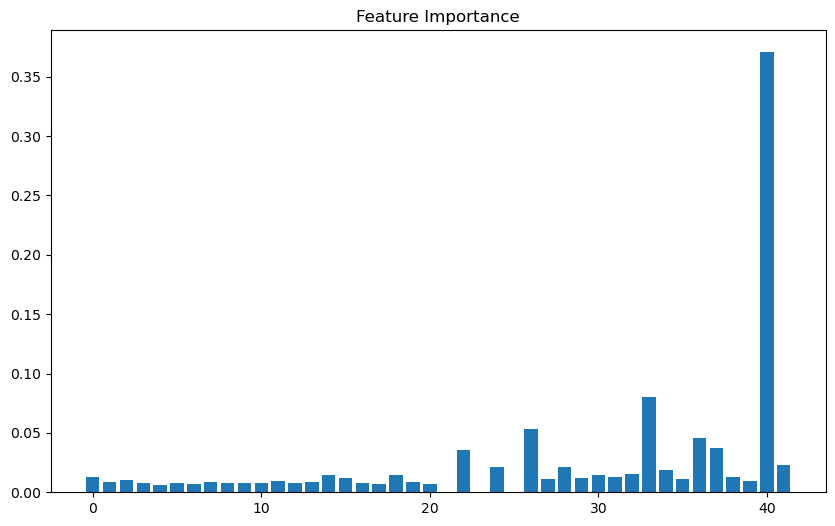

In [26]:
# Feature importance plot
importance = model.feature_importances_
plt.figure(figsize=(10,6))
plt.bar(range(len(importance)), importance)
plt.title('Feature Importance')
plt.show()
